# IMPORT RIVER DISCHARGE DATA USING PYTHON PANDAS LIBRARY

Created Sunday May 31th, 2020
By Irina Overeem

We will be looking at data on river discharge - the volume of water transported through a given cross section per time- of the Colorado River. 
To place any new measurements into context it is relevant to use continuous gauging data. 

River discharge data for many US rivers is available from the USGS water watch website: 
http://waterwatch.usgs.gov/?m=real&r=co

River stage data is typically measured by keeping track of the water surface height over time, i.e. stage, and this needs to be converted to discharge through a stage-discharge relationship. 

Tabular data like this data with a combination of dates, name and data quality strings, and numbers are best handled by spreadsheets where entries such as dates and times are in some useful format. In Python the Python Data Analysis Library (a.k.a. Pandas) is really useful for this purpose.

I use one discharge data file downloaded for the USGS station at Kremmling, CO, for the Upper Colorado. 

In this notebook will use partially cleaned up files, because the header in the USGS file is somewhat unique for each station, making it difficult to deal with it in an automated way. 
To prepare the file I cut of the header in a text-editor, cut the line that has 15 s ..., and saved it as a *.csv file. 

Topical learning objectives
1. concept of river discharge and stage
2. what are stage discharge relationships
3. what are some difficulties for relating stage to discharge

Python Skill Learning Objectives:
1. Load csv data from a file using the Pandas library.
2. Access data in DataFrames.
3. Create plots of data in DataFrames.
4. Save figures to file.

## USGS River Discharge Data at Kremmling, CO

In [2]:
# import the pandas library, this is one of Pythons useful 'packages'
import pandas as pd

# read the file posted with this excercise
data = pd.read_csv('USGS09058000_discharge_NoHead_2011onwards.csv')

# print the first five lines to see whether it populated the fields
# with the head() method, you can see the structure of the data without having to print the entire dataframe.
data.head()

,USGS,9058000,1/1/11 0:00,MST,288,A
0,USGS,9058000,1/1/11 0:15,MST,288,A
1,USGS,9058000,1/1/11 0:30,MST,286,A
2,USGS,9058000,1/1/11 0:45,MST,286,A
3,USGS,9058000,1/1/11 1:00,MST,284,A
4,USGS,9058000,1/1/11 1:15,MST,284,A


We have just created a Data Frame. 
A DataFrame is a 2-dimensional data structure that can store data of different types (including characters, integers, floating point values, factors and more) in columns. It is similar to a spreadsheet, or an database/ SQL table.
You can check the type of the object data using the type module. The type module and __class__ attribute tell us what type of object the variable points to.

Then: each column in a DataFrame also has its own type. We can use data.dtypes to view the data type for each column. int64 are numeric integer values - int64 cells can not store decimals, object are strings (letters and numbers), and float64 are numbers with decimals.

In [3]:
print(type(data))
print(data.__class__)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [4]:
data.dtypes

USGS           object
9058000         int64
1/1/11 0:00    object
MST            object
288             int64
A              object
dtype: object

In [6]:
new_column_names = ['Agency', 'SiteNo', 'OldDateTime', 'Timezone', 'Discharge_cfs', 'Discharge_stat']

The values in each column of a Pandas DataFrame can be accessed using the column name. If we want to access more than one column at once, we use a list of column names. For example, this is how you access the field of discharge which is reported in cubic feet/sec. 

In [7]:
data.columns = new_column_names
data[['Discharge_cfs']].head()

,Discharge_cfs
0,288
1,286
2,286
3,284
4,284


In [8]:
# we can also call the data using the same syntax and manipulate it
# here we convert the discharge from cubic feet per second to metric units m3/sec 
data['Discharge_m3sec'] = data['Discharge_cfs'] * 0.028316847 
data['Discharge_m3sec'].head()

#INSTEAD You can also replace the existing values in Discharge_cfs column by setting the column equal to the output of the applied function.

0    8.155252
1    8.098618
2    8.098618
3    8.041985
4    8.041985
Name: Discharge_m3sec, dtype: float64

When Pandas imported the data, it read the station name (a number) as an integer and removed the initial zero. We can fix the station name by replacing the values of that column with a string.
Remember that the goal is to automate the process for multiple stations. Instead of writing the corrected station name ourselves, let’s build it from the values available in the DataFrame.

The Pandas method unique returns a numpy array of the unique elements in the DataFrame. We want the first (and only) entry in that array, which has the index 0. We can build a string with the correct station name by casting that value as a string and concatenating it with an initial zero.

We can replace all values in the ‘Station’ column with this string through assignment and check the object type of each column to make sure it is no longer an integer.

In [9]:
new_station_name = "0" + str(data['SiteNo'].unique()[0])
data['SiteNo'] = new_station_name

data.head()

,Agency,SiteNo,OldDateTime,Timezone,Discharge_cfs,Discharge_stat,Discharge_m3sec
0,USGS,09058000,1/1/11 0:15,MST,288,A,8.155252
1,USGS,09058000,1/1/11 0:30,MST,286,A,8.098618
2,USGS,09058000,1/1/11 0:45,MST,286,A,8.098618
3,USGS,09058000,1/1/11 1:00,MST,284,A,8.041985
4,USGS,09058000,1/1/11 1:15,MST,284,A,8.041985


## Handling Date and Time stamps

Different programming languages and software packages handle date and time stamps in their own unique ways. Pandas has a set of functions for creating and managing timeseries.

We need to convert the entries in the DateTime column into a format that Pandas can work with. Luckily, the to_datetime function in the Pandas library can convert it directly. Note that this conversion takes up a bit of time, wait till you see those first five lines reported....


In [10]:
data['DateTime'] = pd.to_datetime(data['OldDateTime'])
data.head()

,Agency,SiteNo,OldDateTime,Timezone,Discharge_cfs,Discharge_stat,Discharge_m3sec,DateTime
0,USGS,09058000,1/1/11 0:15,MST,288,A,8.155252,2011-01-01 00:15:00
1,USGS,09058000,1/1/11 0:30,MST,286,A,8.098618,2011-01-01 00:30:00
2,USGS,09058000,1/1/11 0:45,MST,286,A,8.098618,2011-01-01 00:45:00
3,USGS,09058000,1/1/11 1:00,MST,284,A,8.041985,2011-01-01 01:00:00
4,USGS,09058000,1/1/11 1:15,MST,284,A,8.041985,2011-01-01 01:15:00


In [11]:
#The entries in our DataFrame data are indexed by the number in bold on the left side of each row. 
# We can display a slice of the data using index ranges:
# Note in Python the index starts at 0 and is exclusive of the last number of the index (untill)
data[0:4]

,Agency,SiteNo,OldDateTime,Timezone,Discharge_cfs,Discharge_stat,Discharge_m3sec,DateTime
0,USGS,09058000,1/1/11 0:15,MST,288,A,8.155252,2011-01-01 00:15:00
1,USGS,09058000,1/1/11 0:30,MST,286,A,8.098618,2011-01-01 00:30:00
2,USGS,09058000,1/1/11 0:45,MST,286,A,8.098618,2011-01-01 00:45:00
3,USGS,09058000,1/1/11 1:00,MST,284,A,8.041985,2011-01-01 01:00:00


 ## <font color = green> Assignment 1 </font> 

Can you print out the river discharge on 1/1/11 at 6am?
Can you print out the very last entry in the dataset? When was this?

In [39]:
# your print statements here
data["Discharge_m3sec"][23:24]

#data["Discharge_m3sec"].iloc[-1]


23    8.041985
Name: Discharge_m3sec, dtype: float64

## Creating data subsets and removing columns

We can select specific ranges of our data in both the row and column directions using either label or integer-based indexing.

loc: indexing via labels or integers <br>
iloc: indexing via integers <br>
To select a subset of rows AND columns from our DataFrame, we can use the iloc method and the integer indices for both rows and columns. 

In [25]:
data.iloc[0:2,-2:]

,Discharge_m3sec,DateTime
0,20.161595,1987-01-01 00:00:00
1,20.331496,1987-01-01 01:00:00


In [26]:
data.loc[0:2, ['DateTime', 'Discharge_m3sec']]

,DateTime,Discharge_m3sec
0,1987-01-01 00:00:00,20.161595
1,1987-01-01 01:00:00,20.331496
2,1987-01-01 02:00:00,20.529714


In [27]:
print('With iloc:', data.iloc[0:2,-2:].shape)
print('With loc:', data.loc[0:2, ['DateTime', 'Discharge_m3sec']].shape)

With iloc: (2, 2)
With loc: (3, 2)


Since we can call individual columns (or lists of columns) from a DataFrame, the simplest way to remove columns is by creating a new DataFrame with only the columns we want.

In [28]:
discharge_data = data[['DateTime', 'Discharge_m3sec']]
discharge_data.head()

,DateTime,Discharge_m3sec
0,1987-01-01 00:00:00,20.161595
1,1987-01-01 01:00:00,20.331496
2,1987-01-01 02:00:00,20.529714
3,1987-01-01 03:00:00,20.331496
4,1987-01-01 04:00:00,19.765159


 ## <font color = green> Assignment 2 </font> 

Use the iloc method to create a new dataframe that has DateTime and Discharge over just 2012. 
Take into account that measurements are taken hourly. 
To check whether you have selected indeed the whole year, print out the last 12 values of the newly created data frame.

In [ ]:
# your code here

## Creating Discharge Plots
Pandas is well integrated with the matplotlib library. We can either use the same functions we used before with to plot data in NumPy arrays or we can use the plotting functions built into Pandas.

Text(0.5, 1.0, 'Gauging Station 09058000')

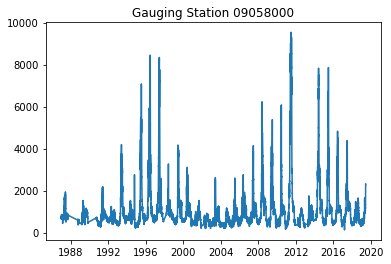

In [30]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters 
register_matplotlib_converters()

plt.plot(data['DateTime'], data['Discharge_cfs'])
plt.title('Gauging Station ' + data['SiteNo'][0])

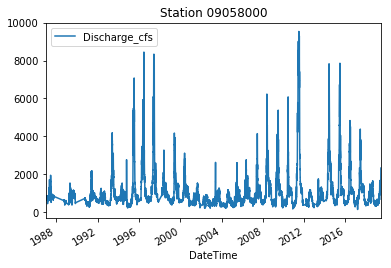

In [31]:
data.plot(x='DateTime', y='Discharge_cfs', title='Station ' + data['SiteNo'][0])

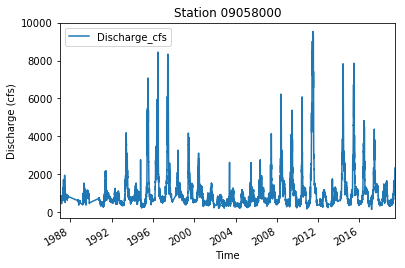

In [32]:
data.plot(x='DateTime', y='Discharge_cfs', title='Station ' + data['SiteNo'][0])
plt.xlabel('Time')
plt.ylabel('Discharge (cfs)')

# to save your figure to a file, specify a name before the final plotting command
plt.savefig('USGStestplot.png')
#plt.savefig('discharge_' + data['SiteNo'][0] + '.png')
plt.show()

 ## <font color = green> Assignment 3 </font> 

1. make a plot of discharge over 2012 only
2. relabel the title to call this USGS station at Kremmling, CO
3. plot the line in black


In [ ]:
# your code goes here

## Filtering Values

Another useful data wrangling option is the ability to filter data from an existing pandas dataframe.

Filtering data is easily done using dataframe.column_name == "value". Your output will contain all rows that meet the criteria.

For example, you can filter using a comparison operator on numeric values. For example, you can select all rows from the dataframe that have discharge greater than 4000 cfs by filtering on the Discharge_in_cfs column.



In [34]:
# create new dataframe from filter on values in the `Discharge_cfs` column greater than 8000 cfs

High_discharge_days = data[data.Discharge_cfs > 9000]

# print new dataframe
High_discharge_days

,Agency,SiteNo,OldDateTime,Timezone,Discharge_cfs,Discharge_stat,Discharge_m3sec,DateTime
600057,USGS,09058000,6/9/11 7:15,MDT,9020,A,255.417960,2011-06-09 07:15:00
600062,USGS,09058000,6/9/11 8:30,MDT,9020,A,255.417960,2011-06-09 08:30:00
600064,USGS,09058000,6/9/11 9:00,MDT,9020,A,255.417960,2011-06-09 09:00:00
601562,USGS,09058000,6/24/11 23:30,MDT,9020,A,255.417960,2011-06-24 23:30:00
601563,USGS,09058000,6/24/11 23:45,MDT,9040,A,255.984297,2011-06-24 23:45:00
601564,USGS,09058000,6/25/11 0:00,MDT,9040,A,255.984297,2011-06-25 00:00:00
601565,USGS,09058000,6/25/11 0:15,MDT,9040,A,255.984297,2011-06-25 00:15:00
601566,USGS,09058000,6/25/11 0:30,MDT,9060,A,256.550634,2011-06-25 00:30:00
601567,USGS,09058000,6/25/11 0:45,MDT,9060,A,256.550634,2011-06-25 00:45:00
601568,USGS,09058000,6/25/11 1:00,MDT,9070,A,256.833802,2011-06-25 01:00:00


 ## <font color = green> Assignment 4 </font> 
1. what is the lowest flow recorded at the Kremmling USGS station?
2. create new dataframe from filter on values in the `Discharge_cfs` column that captures the 10 lowest flow hours


In [ ]:
# your code here

 ## <font color = green> Assignment 5 </font> 
 
 1. Search for this specific USGS river monitoring site (see link in top description) at Kremmling, Colorado. 
 2. Download the gage height data for 2012.
 3. Manipulate the data for 2012 and plot gage heigth on x-axis and associated discharge on y-axis 
 3. Can you retrieve the stage-discharge relationship for this station?


## WOW YOU MADE IT ALL THE WAY HERE! 